# Daily Trading Model
### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


import warnings
warnings.filterwarnings('ignore')

C:\CustomProgram\anaconda3\envs\pyvizenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\CustomProgram\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\CustomProgram\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


### Call Library script to get daily close

In [2]:
#  define ticker/symbol
TICKER = 'F'

In [3]:
# load library module
import sys
sys.path.append('.')
import algo_lib

df = algo_lib.historical_daily(TICKER)
df = df[['Close']]
df.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1972-06-01,2.153220
1972-06-02,2.149165
1972-06-05,2.149165
1972-06-06,2.124835
1972-06-07,2.112669


In [4]:
# Drop NAs and calculate daily percent return
df['Daily_return'] = df['Close'].dropna().pct_change()
df.reset_index().to_feather(f'{TICKER}_daily.feather')
df.head(5)

,Close,Daily_return
Date,,
1972-06-01,2.153220,NaN
1972-06-02,2.149165,-0.001883
1972-06-05,2.149165,0.000000
1972-06-06,2.124835,-0.011321
1972-06-07,2.112669,-0.005725


In [5]:
#Creating DataFrame with returns and Actual Value
daily_df = df.copy().drop(columns=['Close'])
daily_df['Actual_Value'] = np.where(df['Daily_return'] > 0 , 1, 0)
daily_df = daily_df.dropna()
daily_df.head()

,Daily_return,Actual_Value
Date,,
1972-06-02,-0.001883,0
1972-06-05,0.000000,0
1972-06-06,-0.011321,0
1972-06-07,-0.005725,0
1972-06-08,-0.007678,0


In [6]:
# Generate crossover signal
x_var_list = ['crossover_signal']
df = algo_lib.crossover_signal(df, x_var_list)
df.head(5)

,Close,Daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Date,,,,,,,
1972-06-02,2.149165,-0.001883,2.151178,2.151189,0.0,-1.0,0.0
1972-06-05,2.149165,0.000000,2.150498,2.150512,0.0,-1.0,-1.0
1972-06-06,2.124835,-0.011321,2.143948,2.144059,0.0,-1.0,-1.0
1972-06-07,2.112669,-0.005725,2.137518,2.137738,0.0,-1.0,-1.0
1972-06-08,2.096449,-0.007678,2.130434,2.130797,0.0,-1.0,-1.0


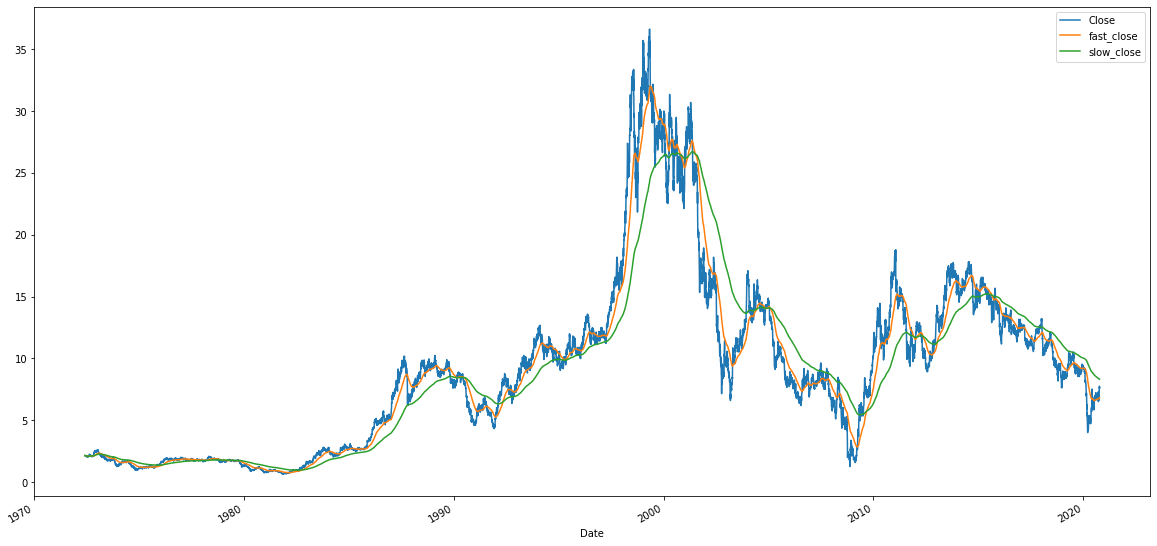

In [7]:
# Plot the EMA of TSLA closing prices
df[['Close', 'fast_close', 'slow_close']].plot(figsize=(20,10))

In [8]:
# Renaming df to trading_signals_df
trading_signals_df = df.copy()
trading_signals_df.head(5)

,Close,Daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
Date,,,,,,,
1972-06-02,2.149165,-0.001883,2.151178,2.151189,0.0,-1.0,0.0
1972-06-05,2.149165,0.000000,2.150498,2.150512,0.0,-1.0,-1.0
1972-06-06,2.124835,-0.011321,2.143948,2.144059,0.0,-1.0,-1.0
1972-06-07,2.112669,-0.005725,2.137518,2.137738,0.0,-1.0,-1.0
1972-06-08,2.096449,-0.007678,2.130434,2.130797,0.0,-1.0,-1.0


In [9]:
# Filter by x-variable list
trading_signals_df[x_var_list]

,crossover_signal
Date,
1972-06-02,0.0
1972-06-05,-1.0
1972-06-06,-1.0
1972-06-07,-1.0
1972-06-08,-1.0
...,...
2020-10-09,-1.0
2020-10-12,-1.0
2020-10-13,-1.0


In [10]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
trading_signals_df['Positive Return'] = np.where(trading_signals_df['Daily_return'] > 0, 1.0, 0.0)
trading_signals_df.head(5)

,Close,Daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,Positive Return
Date,,,,,,,,
1972-06-02,2.149165,-0.001883,2.151178,2.151189,0.0,-1.0,0.0,0.0
1972-06-05,2.149165,0.000000,2.150498,2.150512,0.0,-1.0,-1.0,0.0
1972-06-06,2.124835,-0.011321,2.143948,2.144059,0.0,-1.0,-1.0,0.0
1972-06-07,2.112669,-0.005725,2.137518,2.137738,0.0,-1.0,-1.0,0.0
1972-06-08,2.096449,-0.007678,2.130434,2.130797,0.0,-1.0,-1.0,0.0


In [11]:
# Construct training start and end dates

training_start = trading_signals_df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2019-10-04'

# Construct testing start and end dates
testing_start =  '2019-10-07'
testing_end = trading_signals_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 1972-06-02
Training End: 2019-10-04
Testing Start: 2019-10-07
Testing End: 2020-10-15


In [12]:
# Construct the X_train and y_train datasets
X_train = trading_signals_df[x_var_list][training_start:training_end]
y_train = trading_signals_df['Positive Return'][training_start:training_end]

X_train.tail(5)

,crossover_signal
Date,
2019-09-30,-1.0
2019-10-01,-1.0
2019-10-02,-1.0
2019-10-03,-1.0
2019-10-04,-1.0


In [13]:
# Construct the X test and y test datasets
X_test = trading_signals_df[x_var_list][testing_start:testing_end]
y_test = trading_signals_df['Positive Return'][testing_start:testing_end]

X_test.tail(5)

,crossover_signal
Date,
2020-10-09,-1.0
2020-10-12,-1.0
2020-10-13,-1.0
2020-10-14,-1.0
2020-10-15,-1.0


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [15]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train): (n_est = number of tress, depth is depth in each tree)
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results.head(5)

,Positive Return,Predicted Value
Date,,
2019-10-07,0.0,0.0
2019-10-08,0.0,0.0
2019-10-09,1.0,0.0
2019-10-10,1.0,0.0
2019-10-11,1.0,0.0


In [16]:
# Save the pre-trained model
from joblib import dump, load
dump(model, f'{TICKER}_daily.joblib')

['F_daily.joblib']

In [17]:
# Set index as datetime object and drop extraneous columns

daily_df.set_index(pd.to_datetime(daily_df.index, infer_datetime_format=True), inplace=True)
daily_df.sort_index()
#df.drop(columns=['index'], inplace=True)


daily_df.dropna(inplace=True)
daily_df.head()

,Daily_return,Actual_Value
Date,,
1972-06-02,-0.001883,0
1972-06-05,0.000000,0
1972-06-06,-0.011321,0
1972-06-07,-0.005725,0
1972-06-08,-0.007678,0


In [18]:
# Making predictoins on the X_test: 
model = load(f'{TICKER}_daily.joblib')
predictions = model.predict(X_test)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
# Taking 253 values from the begining head of the df
daily_df = daily_df.iloc[-len(predictions):] 
daily_df.head()

,Daily_return,Actual_Value
Date,,
2019-10-07,-0.006865,0
2019-10-08,-0.016129,0
2019-10-09,0.002342,1
2019-10-10,0.007009,1
2019-10-11,0.018561,1


In [20]:
# Add predicted results to DataFrame
daily_df["Predicted_Value"] = predictions
daily_df.head()

,Daily_return,Actual_Value,Predicted_Value
Date,,,
2019-10-07,-0.006865,0,0.0
2019-10-08,-0.016129,0,0.0
2019-10-09,0.002342,1,0.0
2019-10-10,0.007009,1,0.0
2019-10-11,0.018561,1,0.0


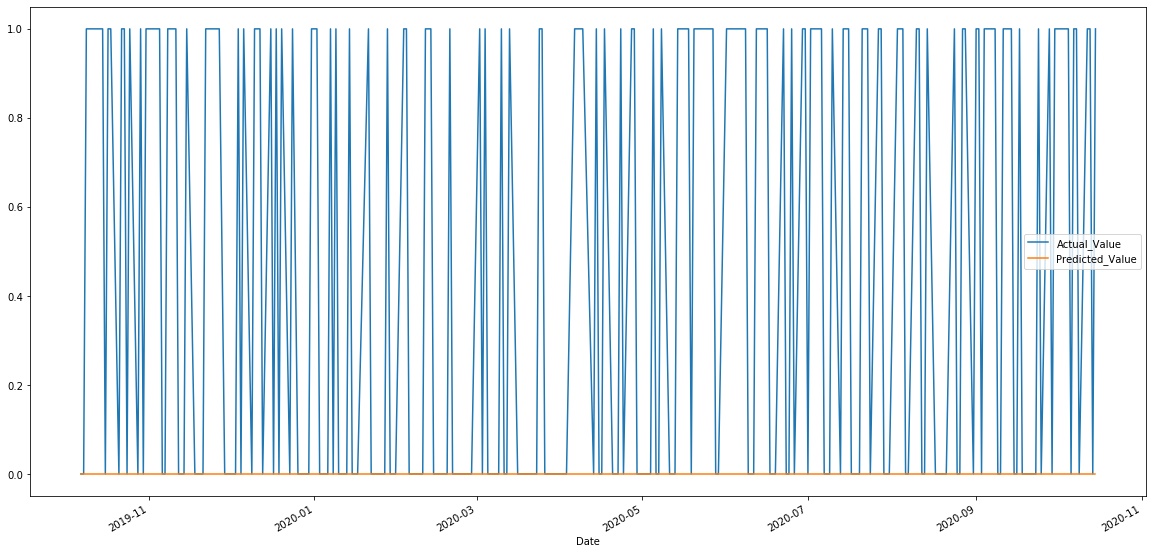

In [21]:
# Plot predicted results vs. actual results

daily_df[['Actual_Value', 'Predicted_Value']].plot(figsize=(20,10))

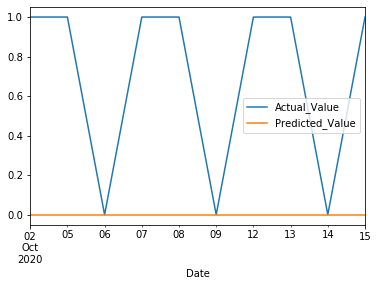

In [22]:
 # Plot last 10 records of predicted vs. actual results

daily_df[['Actual_Value', 'Predicted_Value']].tail(10).plot()

In [23]:
# Replace predicted values 0 to -1 to account for shorting

daily_df['Predicted_Value'].replace(0, -1, inplace=True)
daily_df.head()

,Daily_return,Actual_Value,Predicted_Value
Date,,,
2019-10-07,-0.006865,0,-1.0
2019-10-08,-0.016129,0,-1.0
2019-10-09,0.002342,1,-1.0
2019-10-10,0.007009,1,-1.0
2019-10-11,0.018561,1,-1.0


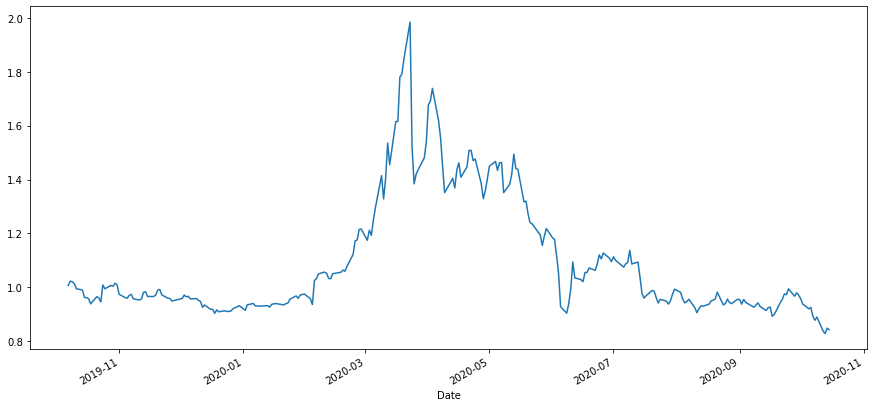

In [24]:
# Calculate cumulative return of model and plot the result of 1 Signal EWM Windows = 50, 200

(1 + (daily_df['Daily_return'] * daily_df['Predicted_Value'])).cumprod().plot(figsize=(15,7))

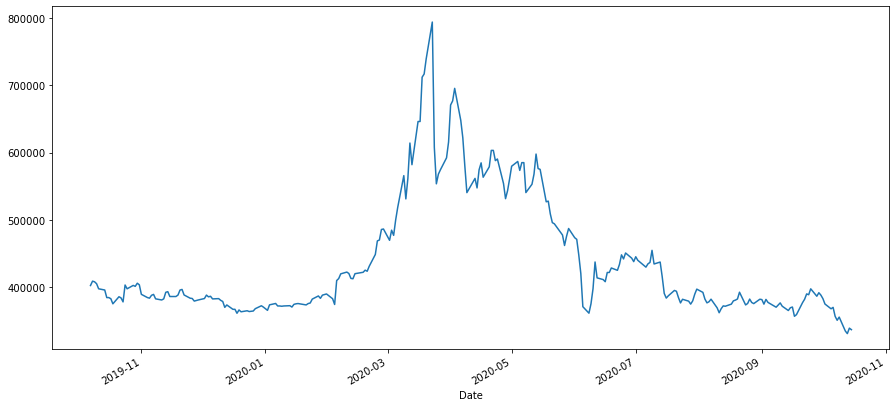

In [25]:
# Set initial capital allocation. (1 Signal EWM Windows = 50, 200)

initial_capital = 400000

# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * (1 + (daily_df['Daily_return'] * daily_df['Predicted_Value'])).cumprod()
cumulative_return_capital.plot(figsize=(15,7))

